In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df_nyc = pd.read_csv('data/data_snapshot_for_gdv.csv')
df_nyc.head()

,neighborhood,complaint_type,year,month,complaint_count,median_resolution_time_hours,median_rent
0,Bayside - Little Neck,Illegal Parking,2024,1,7,1.985833,2473.0
1,Bayside - Little Neck,Abandoned Vehicle,2024,1,3,2.465833,2473.0
2,Bayside - Little Neck,Building/Use,2024,1,2,886.584028,2473.0
3,Bayside - Little Neck,APPLIANCE,2024,1,1,260.415278,2473.0
4,Bayside - Little Neck,Bike/Roller/Skate Chronic,2024,1,1,0.145833,2473.0


In [45]:
last_to_help = df_nyc.groupby('neighborhood').agg({'median_resolution_time_hours': 'median'}).sort_values(by='median_resolution_time_hours', ascending=False)
last_to_help

,median_resolution_time_hours
neighborhood,
Williamsburg - Bushwick,85.333333
Northeast Bronx,66.921667
East Flatbush - Flatbush,66.801667
Bedford Stuyvesant - Crown Heights,65.728889
Pelham - Throgs Neck,63.029444
Bensonhurst - Bay Ridge,59.976944
Downtown - Heights - Park Slope,56.847639
Coney Island - Sheepshead Bay,52.654861
Central Harlem - Morningside Heights,50.143889


In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load directly from NYC Open Data URLs
boro_url = "https://data.cityofnewyork.us/api/geospatial/7t3b-ywvw?method=export&format=GeoJSON"
nta_url  = "https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON"

g_boro = gpd.read_file(boro_url).to_crs(3857)
g_nta  = gpd.read_file(nta_url).to_crs(3857)

# Plot empty boundaries
fig, ax = plt.subplots(figsize=(8, 11), dpi=200)

# Light fill for boroughs
g_boro.plot(ax=ax, color="#f2f2f2", edgecolor="none")

# Black neighborhood borders
g_nta.boundary.plot(ax=ax, linewidth=0.35, edgecolor="#202020")

ax.set_axis_off()
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

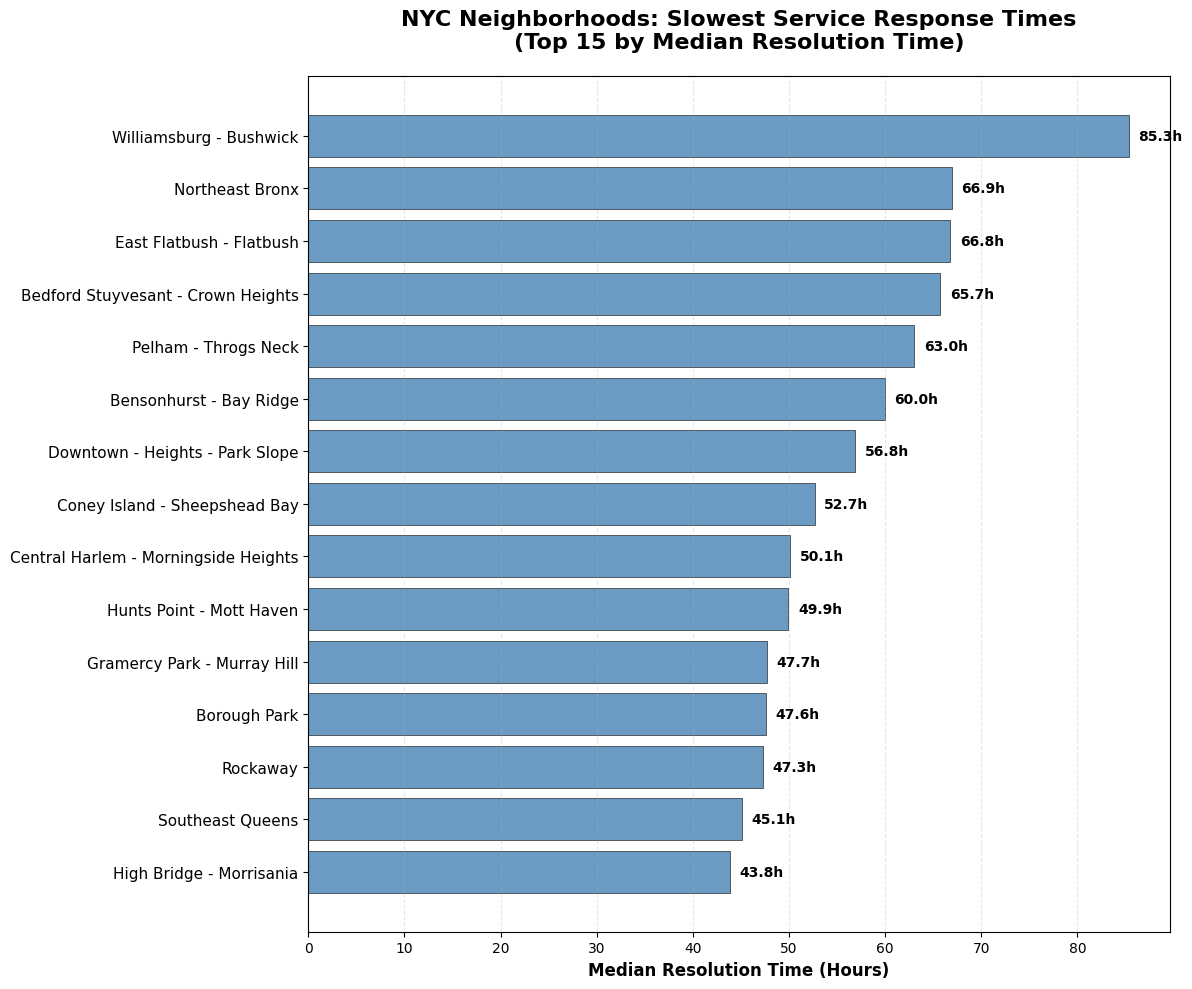

In [46]:
# Create horizontal bar chart for neighborhoods
top_15_neighborhoods = last_to_help.head(15)

plt.figure(figsize=(12, 10))

# Create horizontal bars with single color
bars = plt.barh(range(len(top_15_neighborhoods)), 
                top_15_neighborhoods['median_resolution_time_hours'],
                color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)

# Add value labels
for i, time in enumerate(top_15_neighborhoods['median_resolution_time_hours']):
    plt.text(time + 1, i, f'{time:.1f}h', 
             va='center', ha='left', fontsize=10, fontweight='bold')

# Customize the chart
plt.yticks(range(len(top_15_neighborhoods)), top_15_neighborhoods.index, fontsize=11)
plt.xlabel('Median Resolution Time (Hours)', fontsize=12, fontweight='bold')
plt.title('NYC Neighborhoods: Slowest Service Response Times\n(Top 15 by Median Resolution Time)', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Invert y-axis to show worst performers at top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [47]:
last_to_solve = df_nyc.groupby('complaint_type').agg({'median_resolution_time_hours': 'median'}).sort_values(by='median_resolution_time_hours', ascending=False).head(10)
last_to_solve

,median_resolution_time_hours
complaint_type,
New Tree Request,8064.127778
Tattooing,6775.686111
Day Care,4586.018333
Smoking,3597.227778
Lot Condition,3424.741389
Food Establishment,2341.247917
Mobile Food Vendor,2335.292083
Green Taxi Complaint,1904.562986
For Hire Vehicle Complaint,1843.653333


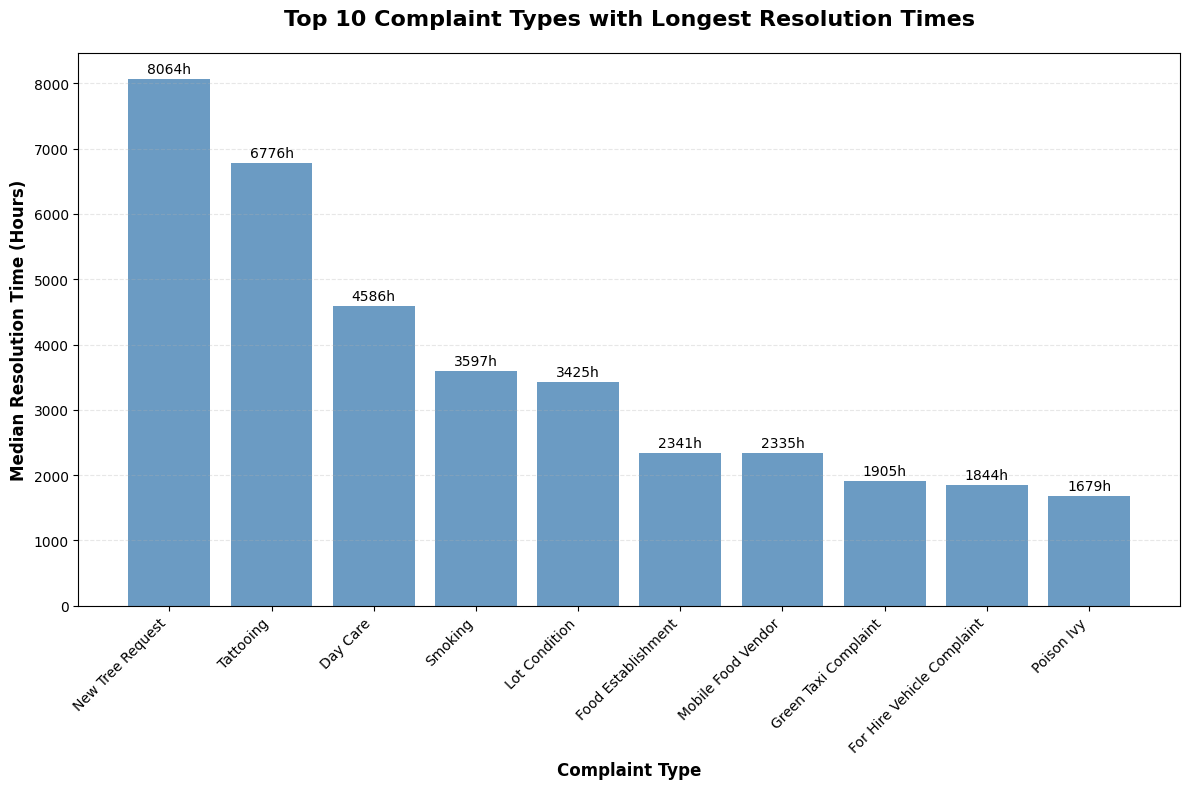

In [48]:
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(last_to_solve)), last_to_solve['median_resolution_time_hours'], 
               color='steelblue', alpha=0.8)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{height:.0f}h', ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.title('Top 10 Complaint Types with Longest Resolution Times', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Complaint Type', fontsize=12, fontweight='bold')
plt.ylabel('Median Resolution Time (Hours)', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(range(len(last_to_solve)), last_to_solve.index, 
           rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

In [49]:
top_city_pains = df_nyc.groupby('complaint_type').agg({'complaint_count': 'sum', 'median_resolution_time_hours': 'median'}).sort_values(by='complaint_count', ascending=False).head(10)
top_city_pains

,complaint_count,median_resolution_time_hours
complaint_type,,
Illegal Parking,10473,1.340694
Noise - Residential,9652,0.824931
HEAT/HOT WATER,4833,32.877639
Noise - Street/Sidewalk,3953,0.730972
Blocked Driveway,3476,1.533542
Illegal Fireworks,2046,0.643889
UNSANITARY CONDITION,1609,282.073889
Abandoned Vehicle,1480,1.763472
Noise - Commercial,1377,0.764722


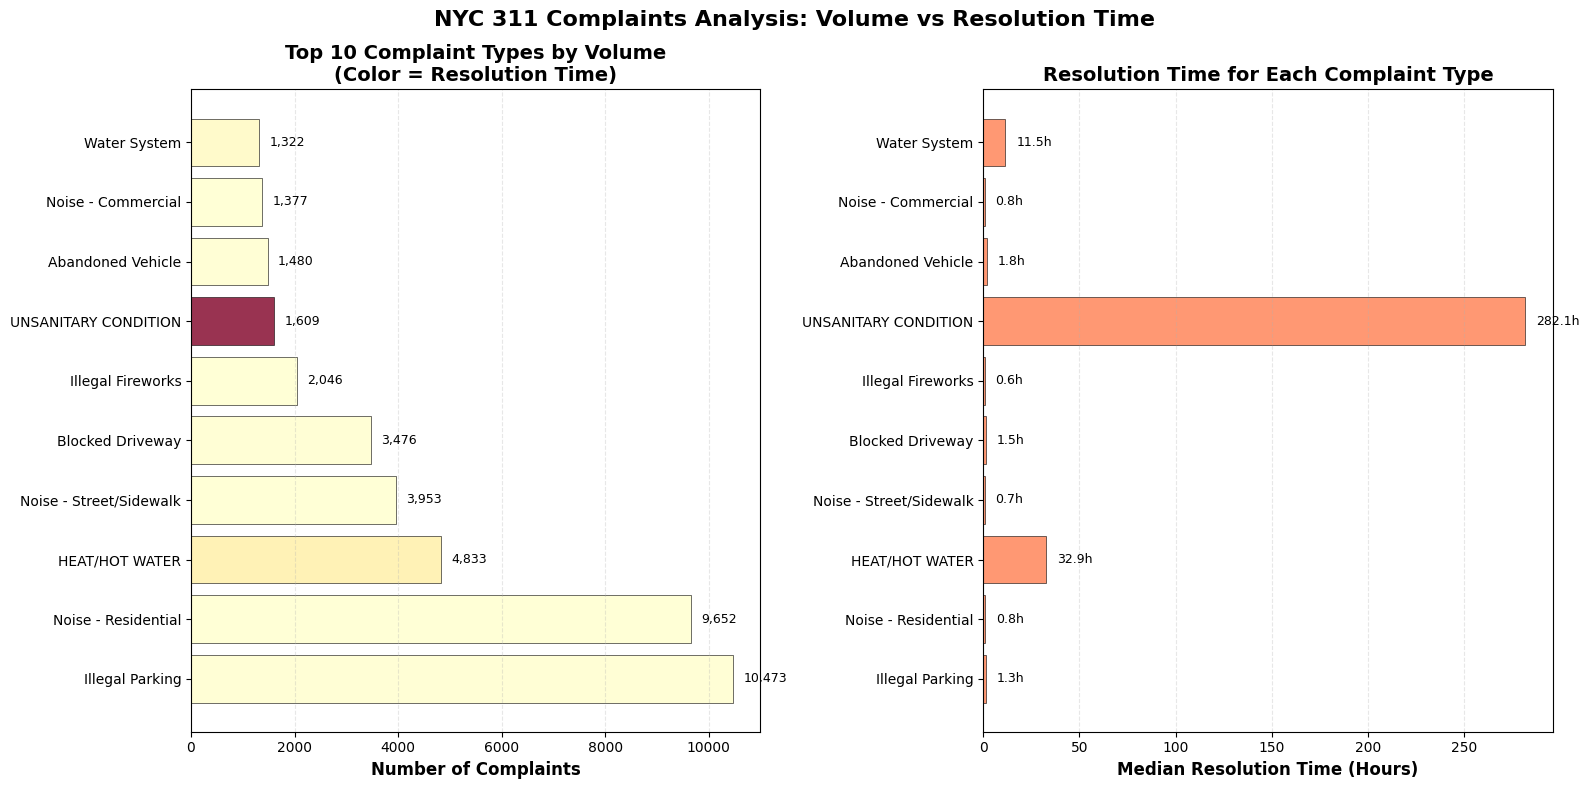

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Chart 1: Complaint Count (horizontal bars colored by resolution time)
# Dark colors for long resolution times, light colors for short resolution times
colors = plt.cm.YlOrRd(top_city_pains['median_resolution_time_hours'] / top_city_pains['median_resolution_time_hours'].max())
bars1 = ax1.barh(range(len(top_city_pains)), top_city_pains['complaint_count'], 
                 color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

# Add value labels
for i, (count, time) in enumerate(zip(top_city_pains['complaint_count'], top_city_pains['median_resolution_time_hours'])):
    ax1.text(count + 200, i, f'{count:,}', va='center', ha='left', fontsize=9)

ax1.set_yticks(range(len(top_city_pains)))
ax1.set_yticklabels(top_city_pains.index, fontsize=10)
ax1.set_xlabel('Number of Complaints', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Complaint Types by Volume\n(Color = Resolution Time)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Chart 2: Resolution Time (horizontal bars)
bars2 = ax2.barh(range(len(top_city_pains)), top_city_pains['median_resolution_time_hours'], 
                 color='coral', alpha=0.8, edgecolor='black', linewidth=0.5)

# Add value labels
for i, time in enumerate(top_city_pains['median_resolution_time_hours']):
    ax2.text(time + max(top_city_pains['median_resolution_time_hours'])*0.02, i, 
             f'{time:.1f}h', va='center', ha='left', fontsize=9)

ax2.set_yticks(range(len(top_city_pains)))
ax2.set_yticklabels(top_city_pains.index, fontsize=10)
ax2.set_xlabel('Median Resolution Time (Hours)', fontsize=12, fontweight='bold')
ax2.set_title('Resolution Time for Each Complaint Type', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Add overall title
fig.suptitle('NYC 311 Complaints Analysis: Volume vs Resolution Time', fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()